# Libraires

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import PassiveAggressiveClassifier #used to train the model
from sklearn.metrics import accuracy_score, confusion_matrix # this is used to analyze the results.
from sklearn.model_selection import train_test_split # to separate the dataset.
from sklearn.feature_extraction.text import TfidfVectorizer #used for the transformation of text data.

# Load Data

In [6]:
data=pd.read_csv('title_text.csv').drop(['Unnamed: 0'],axis=1)
data.head()

,title,text,isFake
0,Nancy Pelosi Backs BOMBSHELL Legislation That...,Donald Trump hasn t even been president for a ...,True
1,Ukraine prosecutor says puzzled by lack of U.S...,KIEV (Reuters) - Ukraine is puzzled by the lac...,False
2,Trump nominates businessman with Asia backgrou...,WASHINGTON (Reuters) - U.S. President Donald T...,False
3,Zimbabwe's Mnangagwa opens amnesty window for ...,"HARARE (Reuters) - Zimbabwe s new president, E...",False
4,OBAMA’S COMMUNIST ENVIRONMENTAL ARM Tells Kids...,Our children don t need the EPA to tell them h...,True


## Modification du text en données numériques.
Nous partons du principe que les données ont étés clean et que nous pouvons nous concerntrer à créer un model.

Comme les informations principales pour définir des Fake news et des vrai news, se base sur le texte et le titre, nous devons nous focaliser sur ces informations. Il faut ainsi que nous transformons le text et le titre en données afin que notre model puisse utiliser des données numériques pour trouver la bonne réponse. Nous allons utiliser la methode de TF-IDF vectorizing.

### TF-IDF vectorizer
Cette méthode offre la possibilité de déterminer les scores TF-IDF de nos données textuelles. Ce qui signifie : 

TF -> la Fréquence du Terme : le nombre de fois qu'un mot apparaît, en éliminant les mots qui ne sont pas importants.

IDF -> la fréquence inverse de détection : le même concept que TF, mais l'analyse va au-delà de la simple ligne, la fréquence dans l'ensemble du dataset est analysée.

Ces informations seront utilisées comme données pour notre modèle d'apprentissage automatique.

(il est important de faire cela uniquement sur nos données d'entraînement, sinon le modèle connaîtra les données de test)

In [7]:
X=data.drop(['isFake'],axis=1)
y=data['isFake']
#spearation en données d'entrainement et de test.
X_train, X_test, y_train, y_test = train_test_split(X['text'], y, test_size=0.2, random_state=42)

tfidf_vectorizer=TfidfVectorizer(use_idf=True)

# On fit et transforme les données d'entrainement.
tfidf_train=tfidf_vectorizer.fit_transform(X_train).toarray()

# on transfomer uniquement le test set, sinon il va connaitre les données test...
tfidf_test=tfidf_vectorizer.transform(X_test)

## Model Passive Agressive

In [10]:
# we build our model: C is the regulation parameter, and denotes the penalization the model will make on an incorrect prediciton.
model = PassiveAggressiveClassifier(C = 0.5, random_state = 5)

#on entraine le model sur les données d'entrainement.
model.fit(tfidf_train,y_train) 

The confusion matrix:
[[4209   22]
 [  25 4310]]
The accuracy of our model:99.4513191688069


In [ ]:
#on sort les predictions
y_pred=model.predict(tfidf_test)

# Model Evaluation

In [11]:
#get the confusion matrix
cm=confusion_matrix(y_test,y_pred)
#get the accuracy of our model.
acc= accuracy_score(y_test,y_pred)

print("The confusion matrix:")
print(cm)

print("The accuracy of our model:"+ str(acc*100))

The confusion matrix:
[[4209   22]
 [  25 4310]]
The accuracy of our model:99.4513191688069


In [12]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      4231
        True       0.99      0.99      0.99      4335

    accuracy                           0.99      8566
   macro avg       0.99      0.99      0.99      8566
weighted avg       0.99      0.99      0.99      8566



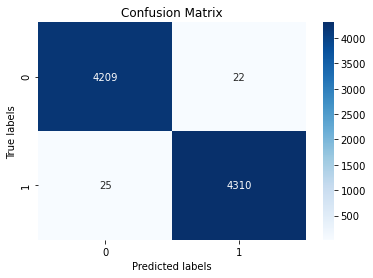

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()